In [1]:
from experiment import Experiment
import torch
torch.manual_seed(2)
%matplotlib inline

In [2]:
var_dict = dict(
    numerical_vars = ['Length', 'Diameter', 'Height' ,'Whole_weight', 
                      'Shucked_weight', 'Viscera_weight', 'Shell_weight'],
    categorical_vars = ['Sex'],
    class_var = 'class'
)

In [3]:
exp = Experiment('data/abalone.csv', 
                 var_dict,
                 embedding_dim=8,
                 lr=5e-3,
                 batch_size=1024,
                 n_epoch=50,
                 verbose=True,
                 n_bins_range=range(2, 21),
                 n_init_bins_list=[10,15,20])

In [51]:
%time clustering_scores = exp.test_clustering_performance()

>>> Epoch = 1, Loss = 0.4531402587890625
[8, 7, 7, 7, 6, 8, 4]
>>> Epoch = 2, Loss = 0.3115905225276947
[8, 7, 7, 3, 10, 6, 4]
>>> Epoch = 3, Loss = 0.2856750786304474
[8, 4, 7, 7, 9, 6, 4]
>>> Epoch = 4, Loss = 0.25784364342689514
[2, 4, 8, 5, 8, 5, 4]
>>> Epoch = 5, Loss = 0.2403676062822342
[2, 4, 9, 7, 7, 5, 2]
>>> Epoch = 6, Loss = 0.22936376929283142
[2, 4, 6, 5, 4, 4, 3]
0 5
>>> Epoch = 7, Loss = 0.22465714812278748
[2, 4, 4, 6, 4, 4, 3]
0 5
>>> Epoch = 8, Loss = 0.21747110784053802
[2, 5, 2, 3, 4, 4, 5]
0 5
>>> Epoch = 9, Loss = 0.21584855020046234
[2, 3, 2, 6, 4, 3, 4]
0 5
>>> Epoch = 10, Loss = 0.21142706274986267
[2, 3, 2, 3, 4, 3, 4]
0 5
>>> Epoch = 11, Loss = 0.21623817086219788
[2, 3, 2, 3, 4, 4, 4]
0 5
>>> Epoch = 12, Loss = 0.21629896759986877
[2, 6, 2, 3, 4, 3, 4]
0 5
>>> Epoch = 13, Loss = 0.21603257954120636
[2, 6, 2, 3, 4, 4, 4]
0 5
>>> Epoch = 14, Loss = 0.21860848367214203
[2, 6, 2, 3, 2, 4, 4]
0 5
>>> Epoch = 15, Loss = 0.21250881254673004
[2, 6, 2, 3, 2, 4, 4]
1

>>> Epoch = 40, Loss = 0.13498389720916748
[4, 4, 3, 2, 3, 3, 2]
0 5
>>> Epoch = 41, Loss = 0.13335002958774567
[3, 4, 3, 6, 3, 3, 2]
0 5
>>> Epoch = 42, Loss = 0.13690723478794098
[3, 4, 3, 6, 3, 3, 2]
1 5
>>> Epoch = 43, Loss = 0.1378358155488968
[3, 4, 3, 2, 3, 3, 2]
2 5
>>> Epoch = 44, Loss = 0.13741837441921234


KeyboardInterrupt: 

In [ ]:
exp.print_clustering_scores(clustering_scores, method='dummy_only')

In [ ]:
exp.print_clustering_scores(clustering_scores, method='scale_numeric')

In [ ]:
exp.print_clustering_scores(clustering_scores, method='equal_width')

In [ ]:
exp.print_clustering_scores(clustering_scores, method='equal_freq')

In [ ]:
exp.print_clustering_scores(clustering_scores, method='semantic_binning')

In [ ]:
%time clf_scores = exp.test_classification_performance(cv=3)

In [ ]:
exp.print_classification_scores(clf_scores, method='dummy_only')

In [ ]:
exp.print_classification_scores(clf_scores, method='scale_numeric')

In [ ]:
exp.print_classification_scores(clf_scores, method='equal_width')

In [ ]:
exp.print_classification_scores(clf_scores, method='equal_freq')

In [ ]:
exp.print_classification_scores(clf_scores, method='semantic_binning')

In [4]:
from data_handler import DataHandler
handler = DataHandler(exp.data, exp.var_dict)
from semantic_binning import SemanticBinning
sb = SemanticBinning(handler.var_dict, embedding_dim=4, batch_size=1024, 
                     n_epoch=100, lr=5e-3, weight_decay=1e-7, verbose=True)
sb.fit(exp.data, n_init_bins=15)

>>> Epoch = 1, Loss = 0.5053015947341919
[12, 10, 15, 10, 12, 12, 12]
>>> Epoch = 2, Loss = 0.28908437490463257
[13, 13, 5, 14, 15, 5, 5]
>>> Epoch = 3, Loss = 0.24457943439483643
[13, 13, 8, 8, 10, 8, 7]
>>> Epoch = 4, Loss = 0.2340724915266037
[10, 4, 11, 11, 15, 13, 10]
>>> Epoch = 5, Loss = 0.22767560184001923
[10, 4, 14, 11, 8, 9, 8]
>>> Epoch = 6, Loss = 0.22203189134597778
[10, 4, 15, 11, 8, 9, 8]
0 5
>>> Epoch = 7, Loss = 0.21689650416374207
[6, 4, 10, 11, 9, 6, 6]
0 5
>>> Epoch = 8, Loss = 0.20858946442604065
[2, 4, 9, 11, 10, 7, 6]
0 5
>>> Epoch = 9, Loss = 0.20248322188854218
[2, 4, 6, 6, 2, 7, 6]
0 5
>>> Epoch = 10, Loss = 0.1933376044034958
[2, 4, 6, 6, 2, 5, 6]
0 5
>>> Epoch = 11, Loss = 0.19024547934532166
[2, 2, 7, 6, 2, 5, 2]
0 5
>>> Epoch = 12, Loss = 0.1839088350534439
[2, 2, 6, 6, 2, 3, 2]
0 5
>>> Epoch = 13, Loss = 0.17804959416389465
[2, 2, 6, 4, 2, 3, 2]
0 5
>>> Epoch = 14, Loss = 0.17620931565761566
[2, 2, 6, 4, 2, 3, 2]
1 5
>>> Epoch = 15, Loss = 0.171154305338

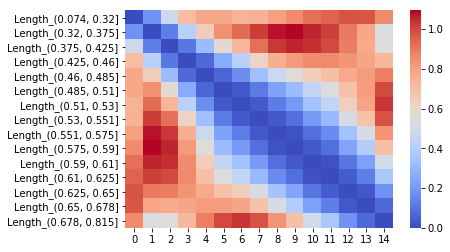

In [5]:
sb.plot_pairwise_distance_between_bins('Length')

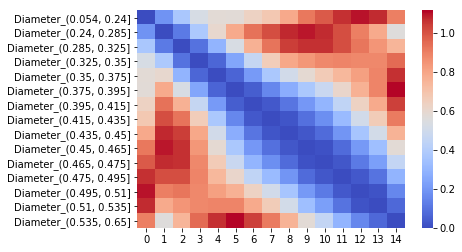

In [6]:
sb.plot_pairwise_distance_between_bins('Diameter')

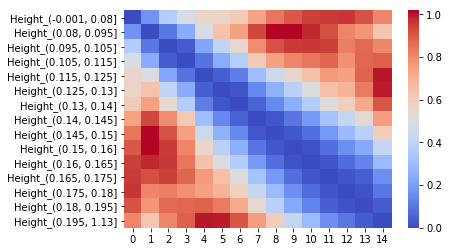

In [7]:
sb.plot_pairwise_distance_between_bins('Height')

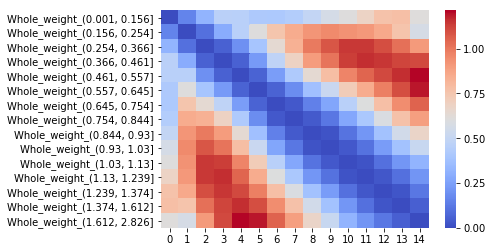

In [8]:
sb.plot_pairwise_distance_between_bins('Whole_weight')

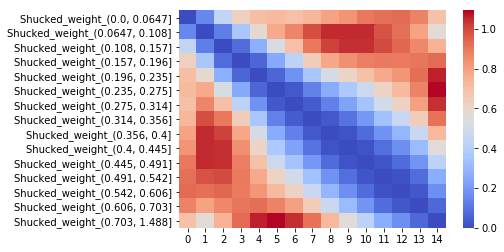

In [9]:
sb.plot_pairwise_distance_between_bins('Shucked_weight')

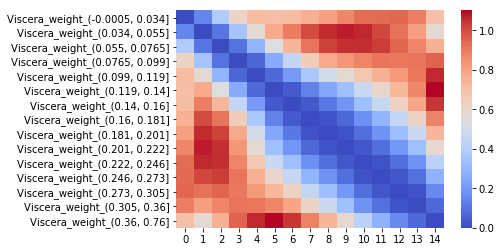

In [10]:
sb.plot_pairwise_distance_between_bins('Viscera_weight')

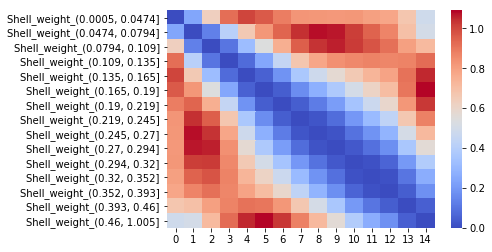

In [11]:
sb.plot_pairwise_distance_between_bins('Shell_weight')

In [12]:
for var, bins in sb.bins_by_var.items():
    print(var)
    print(bins['bins'])

Length
['(0.074, 0.46]', '(0.46, 0.575]', '(0.575, 0.815]']
Diameter
['(0.054, 0.395]', '(0.395, 0.65]']
Height
['(-0.001, 0.14]', '(0.14, 1.13]']
Whole_weight
['(0.001, 0.754]', '(0.754, 2.826]']
Shucked_weight
['(0.0, 0.196]', '(0.196, 0.356]', '(0.356, 1.488]']
Viscera_weight
['(-0.0005, 0.14]', '(0.14, 0.76]']
Shell_weight
['(0.0005, 0.19]', '(0.19, 1.005]']
